# Movie Genre Classification

## Importing Neccessory Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Reading Datasets

In [2]:
mg_train = pd.read_csv("/home/u206160/Codsoft Tasks/1) Movie Genre Classification/Dataset/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
mg_test = pd.read_csv("/home/u206160/Codsoft Tasks/1) Movie Genre Classification/Dataset/test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
mg_test_sol = pd.read_csv("/home/u206160/Codsoft Tasks/1) Movie Genre Classification/Dataset/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')

## Data Preprocessing

In [3]:
mg_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
mg_train.tail()

,ID,TITLE,GENRE,DESCRIPTION
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [5]:
mg_test.head()

/home/u206160/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1595: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/u206160/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/u206160/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [6]:
mg_test.tail()

/home/u206160/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1595: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/u206160/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/u206160/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ...",NaN


In [7]:
mg_test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [8]:
mg_test_sol.tail()

,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),drama,"Curitiba is a city in movement, with rhythms ..."


In [9]:
mg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
mg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   GENRE        54200 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
mg_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [12]:
mg_train.dtypes

ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object

In [13]:
mg_test.dtypes

ID               int64
TITLE           object
GENRE           object
DESCRIPTION    float64
dtype: object

In [14]:
mg_test_sol.dtypes

ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object

## Data Visualization

### Bar Chart

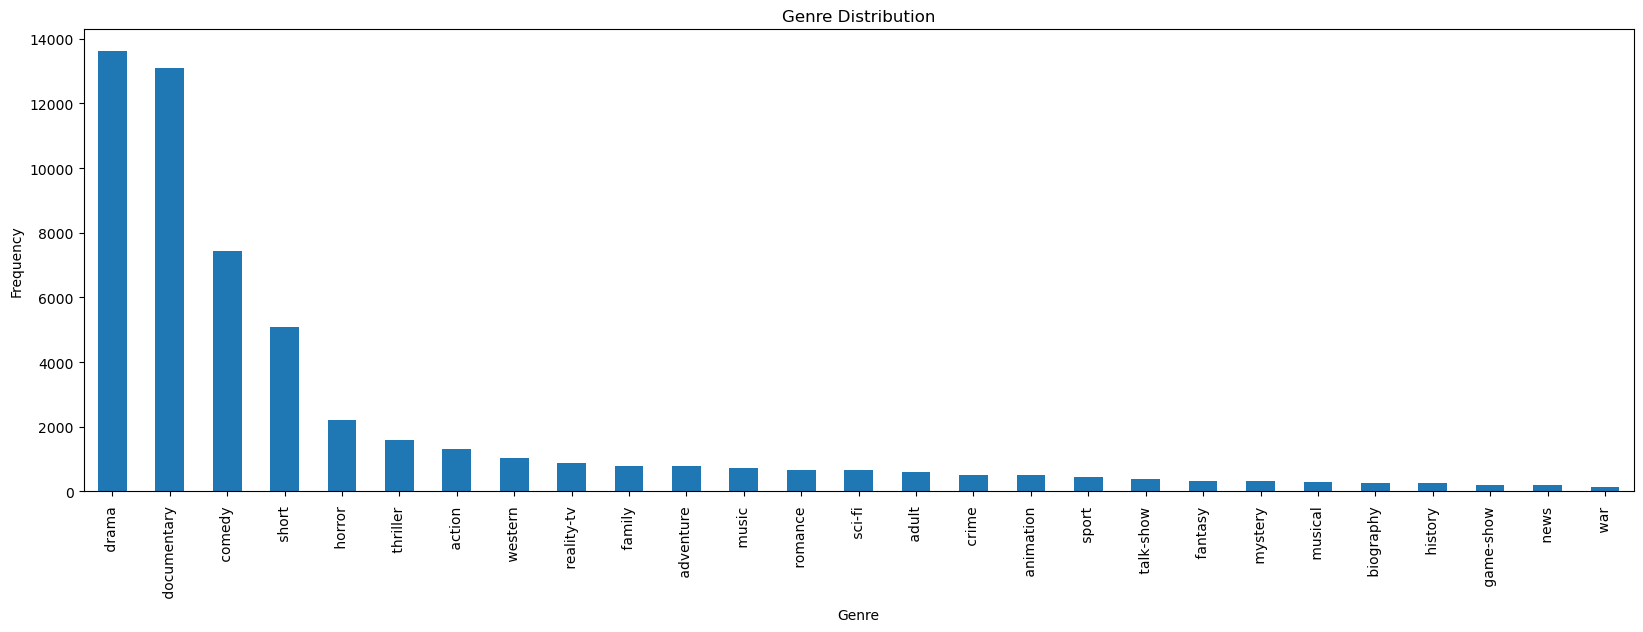

In [15]:
gen_counts = mg_train['GENRE'].value_counts()
plt.figure(figsize=(20,6))
gen_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

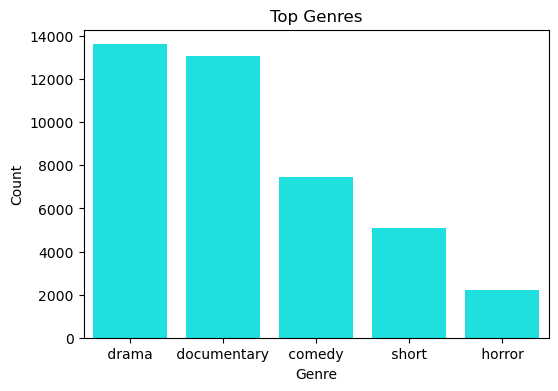

In [16]:
top_gen = mg_train['GENRE'].value_counts().nlargest(5).index
top_gen_df = mg_train[mg_train['GENRE'].isin(top_gen)]
plt.figure(figsize=(6,4))
sns.countplot(data=top_gen_df, x='GENRE', order=top_gen,color='cyan')
plt.title('Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Pie Chart

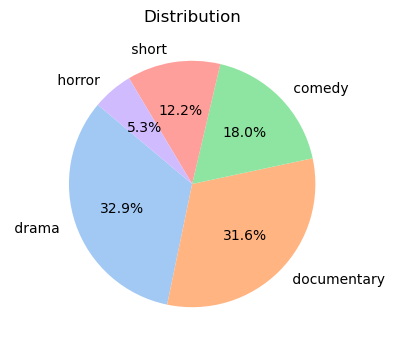

In [17]:
gen_counts = mg_train['GENRE'].value_counts().nlargest(5)
col = sns.color_palette('pastel')[0:len(gen_counts)]
plt.figure(figsize=(4,4))
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%', startangle=140, colors=col)
plt.title('Distribution')
plt.show()

## Encoding and Transforming Data

In [18]:
tf = TfidfVectorizer(max_features=1000)

In [19]:
x_tr = tf.fit_transform(mg_train['DESCRIPTION'])

In [20]:
label_encoder = LabelEncoder()

In [21]:
y_tr = label_encoder.fit_transform(mg_train['GENRE'])
y_ts = label_encoder.fit_transform(mg_test_sol['GENRE'])

## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

## Logistic Regression

In [23]:
lr_mod = LogisticRegression(max_iter=1000)
lr_mod.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
lr_pred = lr_mod.predict(X_test)

In [26]:
y_test_gen = label_encoder.inverse_transform(y_test)
y_pred_gen = label_encoder.inverse_transform(lr_pred)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test_gen, y_pred_gen, zero_division=1))

               precision    recall  f1-score   support

      action        0.37      0.17      0.23       263
       adult        0.65      0.18      0.28       112
   adventure        0.34      0.08      0.13       139
   animation        0.45      0.05      0.09       104
   biography        1.00      0.00      0.00        61
      comedy        0.46      0.52      0.49      1443
       crime        0.25      0.03      0.05       107
 documentary        0.65      0.84      0.74      2659
       drama        0.53      0.75      0.62      2697
      family        0.35      0.09      0.14       150
     fantasy        1.00      0.00      0.00        74
   game-show        0.85      0.28      0.42        40
     history        1.00      0.00      0.00        45
      horror        0.55      0.51      0.53       431
       music        0.57      0.42      0.48       144
     musical        0.67      0.04      0.08        50
     mystery        0.50      0.02      0.03        56
        n

## Support Vector Machine

In [28]:
sv_mod = LinearSVC()
sv_mod.fit(X_train, y_train)

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [29]:
sv_pred = sv_mod.predict(X_test)

In [30]:
y_test_gen = label_encoder.inverse_transform(y_test)
y_pred_gen = label_encoder.inverse_transform(sv_pred)

In [31]:
print(classification_report(y_test_gen, y_pred_gen, zero_division=1))

               precision    recall  f1-score   support

      action        0.32      0.16      0.21       263
       adult        0.55      0.31      0.40       112
   adventure        0.30      0.08      0.12       139
   animation        0.26      0.07      0.11       104
   biography        1.00      0.00      0.00        61
      comedy        0.47      0.49      0.48      1443
       crime        0.27      0.06      0.09       107
 documentary        0.65      0.85      0.74      2659
       drama        0.54      0.73      0.62      2697
      family        0.33      0.10      0.15       150
     fantasy        0.00      0.00      1.00        74
   game-show        0.64      0.45      0.53        40
     history        1.00      0.00      0.00        45
      horror        0.50      0.55      0.52       431
       music        0.52      0.47      0.49       144
     musical        0.33      0.06      0.10        50
     mystery        0.33      0.07      0.12        56
        n

## Naive Bayes

In [32]:
nb_mod = MultinomialNB()
nb_mod.fit(X_train, y_train)

MultinomialNB()

In [33]:
nb_pred = nb_mod.predict(X_test)

In [34]:
y_test_gen = label_encoder.inverse_transform(y_test)
y_pred_gen = label_encoder.inverse_transform(nb_pred)

In [35]:
print(classification_report(y_test_gen, y_pred_gen, zero_division=1))

               precision    recall  f1-score   support

      action        0.00      0.00      1.00       263
       adult        1.00      0.00      0.00       112
   adventure        0.00      0.00      1.00       139
   animation        1.00      0.00      0.00       104
   biography        1.00      0.00      0.00        61
      comedy        0.50      0.26      0.34      1443
       crime        1.00      0.00      0.00       107
 documentary        0.53      0.89      0.66      2659
       drama        0.41      0.83      0.55      2697
      family        0.00      0.00      1.00       150
     fantasy        1.00      0.00      0.00        74
   game-show        1.00      0.05      0.10        40
     history        1.00      0.00      0.00        45
      horror        0.80      0.09      0.16       431
       music        0.75      0.04      0.08       144
     musical        1.00      0.00      0.00        50
     mystery        1.00      0.00      0.00        56
        n

## Accuracy Comparison

In [36]:
lr_acc = accuracy_score(y_test, lr_pred)
sv_acc = accuracy_score(y_test, sv_pred)
nb_acc = accuracy_score(y_test, nb_pred)

In [37]:
print("Logistic Regression Accuracy:", lr_acc)
print("SVM Accuracy:", sv_acc)
print("Naive Bayes Accuracy:", nb_acc)

Logistic Regression Accuracy: 0.5513234344738541
SVM Accuracy: 0.5481877709121092
Naive Bayes Accuracy: 0.4731162962279812


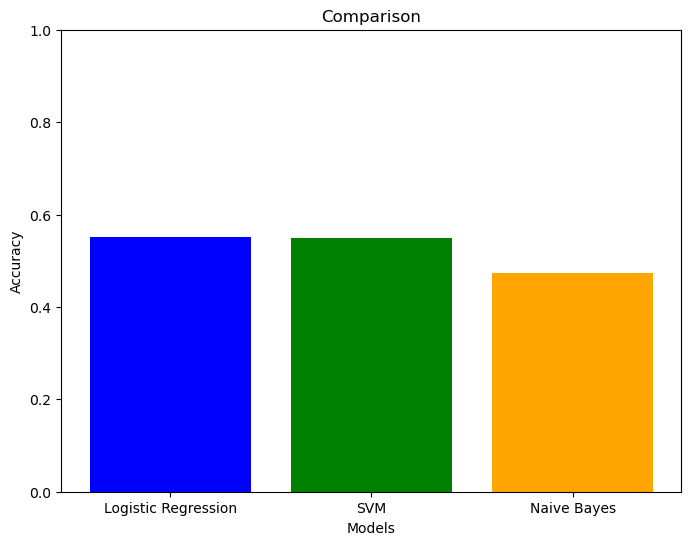

In [39]:
acc = [lr_acc, sv_acc, nb_acc]
mod = ['Logistic Regression', 'SVM', 'Naive Bayes']
plt.figure(figsize=(8, 6))
plt.bar(mod, acc, color=['blue', 'green', 'orange'])
plt.ylim(0, 1) 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison')
plt.show()

## Prediction

In [ ]:
def predict(desc):
    vec = tf.transform([desc])
    pred = lr_mod.predict(vec)
    return label_encoder.inverse_transform(pred)[0]

user_in = input("Enter a movie description: ")
pred_gen = predict(user_in)
print(f"Predicted genre for the movie '{user_in}' is: {pred_gen}")